<a href="https://colab.research.google.com/github/1234567890qqqqqq/BasicProg_DataViz65/blob/main/aon1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ข้อสอบจำนวน 1 ข้อ คะแนน 120 เต็ม 100 คะแนน

จุดมุ่งหมาย: ตัดเกรดรายวิชา Projec
t และวาดกราฟแสดงผลการสอบดังรายละเอียดต่อไปนี้

1. คะแนนประกอบด้วย 2 ส่วน
* คะแนน 40% จากอาจารย์ที่ปรึกษา (จากไฟล์ คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx)
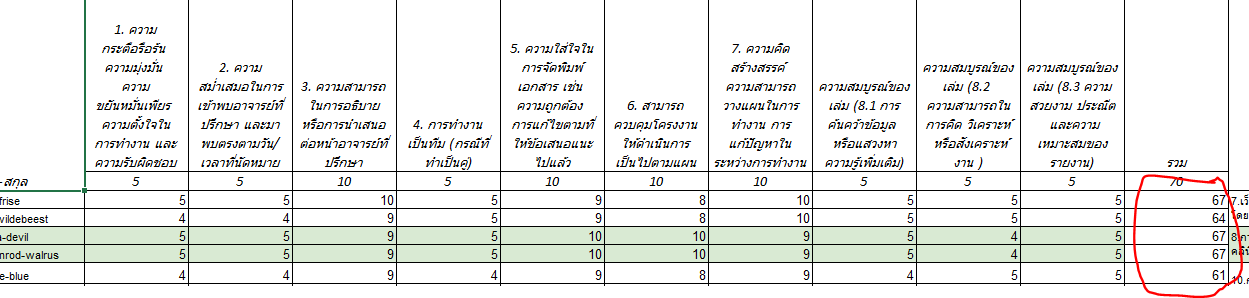

* คะแนน 60% จากกรรมการในห้องโดยมีการสอบทั้งหมดสามวันอยู่คนละ sheet (จากไฟล์ คะแนนสอบปากเปล่าของกรรมการสอบ_renamed.xlsx) *(คะแนนจากกรรมการในห้องจะประกอบไปด้วยคะแนนจากกรรมการ 2 ท่าน ท่านละ 30%)*

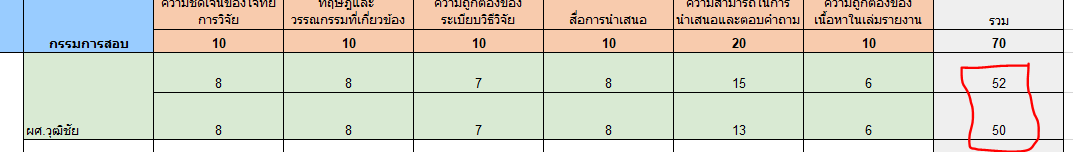

ดาวน์โหลดไฟล์คะแนนทั้งหมดจาก https://drive.google.com/drive/folders/1YB4qdluEN8dCE7vhDrNOW40JoUDyeEyL?usp=sharing

2. รวมคะแนนและตัดเกรดแบบ อิงเกณฑ์ <50 ได้ F ... >= 80 ได้ A และ save ตาราง ชื่อ คะแนนรวมและเกรดที่ได้ของนักศึกษาแต่ละคน
*คะแนนรวม 60 คะแนน (ดึงข้อมูลและรวมข้อมูล 40 ตัดเกรด 20)* 

3. วาดกราฟ
* Stacked Barchartแสดงคะแนนรวมของนักศึกษาแต่ละคนโดยเรียงจากคะแนนรวมมากที่สุดไปน้อยที่สุด (คะแนนส่วนที่ปรึกษา ซ้อนกับ คะแนนสอบปากเปล่า)
* Histogram แสดงจำนวนผู้ได้เกรดต่างๆ
* Boxplot เปรียบเทียบการกระจายของคะแนนที่อ.กรรมการสอบปากเปล่าแต่ละท่านให้นักศึกษา

*คะแนนรวม 60 คะแนน (ข้อละ 20 คะแนน)*

#ตัวอย่าง code บางส่วน ที่อาจจะมีประโยชน์กับการทำข้อสอบ

In [88]:
import pandas as pd  # ใช้จัดการข้อมูลต่าง ๆ ที่เป็นตาราง พวกexcel ,CSV
from google.colab import drive # เชื่อม google drive กับ colab ของเรา นี้เป็นคำสั่งเชื่อม |accout colab กับ Drive ควรเป็น accout เดียวกัน|
drive.mount('/content/drive')
import os # การจัดเก็บเกี่ยวกับไฟล์ต่าง ๆ มันอยู่ที่โฟลเดอร์ไหน จะ list โฟล์เดอร์ออกมา

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
path = '/content/drive/MyDrive/1 65/BPDV65/Final BPVZ65' #บอกทางผ่านในการไปเอาไฟล์ของเรา ว่าผ่านทางไหนบ้าง

In [90]:
day0 = pd.read_excel('/content/drive/MyDrive/1 65/BPDV65/Final BPVZ65/คะแนนสอบปากเปล่าของกรรมการสอบ_renamed.xlsx',sheet_name=0,skiprows=1)
day0.head()

,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม
0,NaN,NaN,NaN,NaN,ที่ปรึกษา,NaN,10,10,10,10,20,10,70
1,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,leaky-rust-chameleon,ดร.ธิปไตย,ผศ.วุฒิชัย,8,8,7,8,15,6,52
2,NaN,NaN,NaN,greasy-ruby-bombay,NaN,NaN,8,8,7,8,13,6,50
3,NaN,NaN,NaN,leaky-rust-chameleon,NaN,อ.ยุภาพร,9,8,8,9,18,8,60
4,NaN,NaN,NaN,greasy-ruby-bombay,NaN,NaN,9,8,8,9,16,8,58


In [91]:
day0_1 = day0.fillna(method='ffill')
day0_1.head()

,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม
0,NaN,NaN,NaN,NaN,ที่ปรึกษา,NaN,10,10,10,10,20,10,70
1,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,leaky-rust-chameleon,ดร.ธิปไตย,ผศ.วุฒิชัย,8,8,7,8,15,6,52
2,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,greasy-ruby-bombay,ดร.ธิปไตย,ผศ.วุฒิชัย,8,8,7,8,13,6,50
3,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,leaky-rust-chameleon,ดร.ธิปไตย,อ.ยุภาพร,9,8,8,9,18,8,60
4,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,greasy-ruby-bombay,ดร.ธิปไตย,อ.ยุภาพร,9,8,8,9,16,8,58


In [92]:
all_aj_list = set(list(day0_1['กรรมการสอบ'].dropna()))
all_aj_list

{'ดร.ธนพงศ์',
 'ดร.ธิปไตย',
 'ดร.พลากร',
 'ดร.วรรณพร',
 'ดร.อุทุมพร',
 'ผศ.วุฒิชัย',
 'ผศ.สุกัญญา',
 'รศ.วิชุดา',
 'อ.ธรรณญพร',
 'อ.ยุภาพร'}

In [93]:
advisor = pd.read_excel('/content/drive/MyDrive/1 65/BPDV65/Final BPVZ65/คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='ดร.ธนพงศ์',skiprows=1)
advisor.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5,5,10,5,10,10,10,5,5,5,70,NaN
1,jumpy-apricot-frise,5,5,10,5,9,8,10,5,5,5,67,7.เว็บแอปพลิเคชันสำหรับการสร้างแบบจำลอง 3 มิติ...
2,boozy-thistle-wildebeest,4,4,9,5,9,8,10,5,5,5,64,NaN
3,hasty-magnolia-devil,5,5,9,5,10,10,9,5,4,5,67,8.การออกแบบและพัฒนาแชทบอทสำหรับการเรียนการสอนโ...
4,chummy-goldenrod-walrus,5,5,9,5,10,10,9,5,4,5,67,NaN


#1.คะแนนประกอบด้วย 2 ส่วน

##คะแนน 40% จากอาจารย์ที่ปรึกษา (จากไฟล์ คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx)

###ดร.ธิปไตย

In [94]:
advisor1 = pd.read_excel('/content/drive/MyDrive/1 65/BPDV65/Final BPVZ65/คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='ดร.ธิปไตย',skiprows=1)
advisor1.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5,5,10,5,10,10,10,5,5,5,70,NaN
1,leaky-rust-chameleon,5,5,9,5,9,10,10,5,5,5,68,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...
2,greasy-ruby-bombay,4,5,7,5,8,10,9,4,5,4,61,NaN
3,wiggy-silver-drever,5,5,8,5,9,10,10,5,5,5,67,2.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้ค...
4,stinky-red-chow,5,5,8,5,9,10,10,5,5,5,67,NaN


In [95]:
advisor1 = advisor1.fillna(method='ffill')
advisor1.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5,5,10,5,10,10,10,5,5,5,70,NaN
1,leaky-rust-chameleon,5,5,9,5,9,10,10,5,5,5,68,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...
2,greasy-ruby-bombay,4,5,7,5,8,10,9,4,5,4,61,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...
3,wiggy-silver-drever,5,5,8,5,9,10,10,5,5,5,67,2.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้ค...
4,stinky-red-chow,5,5,8,5,9,10,10,5,5,5,67,2.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้ค...


In [96]:
advisor1['คะแนนร้อยละ40'] = advisor1['รวม']*40/70
advisor1

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12,คะแนนร้อยละ40
0,NaN,5,5,10,5,10,10,10,5,5,5,70,NaN,40.000000
1,leaky-rust-chameleon,5,5,9,5,9,10,10,5,5,5,68,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,38.857143
2,greasy-ruby-bombay,4,5,7,5,8,10,9,4,5,4,61,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,34.857143
3,wiggy-silver-drever,5,5,8,5,9,10,10,5,5,5,67,2.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้ค...,38.285714
4,stinky-red-chow,5,5,8,5,9,10,10,5,5,5,67,2.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้ค...,38.285714
5,bumpy-indigo-dolphin,5,5,8,5,9,10,10,5,5,5,67,23.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้...,38.285714
6,randy-rust-lionfish,4,4,7,5,8,10,9,4,5,4,60,23.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้...,34.285714
7,flaky-sepia-setter,5,5,9,5,10,10,10,5,5,5,69,32.ความเสี่ยงทางไซเบอร์ในองค์กรที่มีสาเหตุมาจา...,39.428571
8,pasty-tomato-okapi,5,5,9,5,10,10,10,5,5,5,69,32.ความเสี่ยงทางไซเบอร์ในองค์กรที่มีสาเหตุมาจา...,39.428571


select column

In [97]:
advisor11 = advisor1[['Unnamed: 0','รวม','คะแนนร้อยละ40']]
advisor11

,Unnamed: 0,รวม,คะแนนร้อยละ40
0,NaN,70,40.000000
1,leaky-rust-chameleon,68,38.857143
2,greasy-ruby-bombay,61,34.857143
3,wiggy-silver-drever,67,38.285714
4,stinky-red-chow,67,38.285714
5,bumpy-indigo-dolphin,67,38.285714
6,randy-rust-lionfish,60,34.285714
7,flaky-sepia-setter,69,39.428571
8,pasty-tomato-okapi,69,39.428571


In [98]:
advisor11['อาจารย์'] = advisor11['รวม']*40/70
advisor11

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,รวม,คะแนนร้อยละ40,อาจารย์
0,NaN,70,40.000000,40.000000
1,leaky-rust-chameleon,68,38.857143,38.857143
2,greasy-ruby-bombay,61,34.857143,34.857143
3,wiggy-silver-drever,67,38.285714,38.285714
4,stinky-red-chow,67,38.285714,38.285714
5,bumpy-indigo-dolphin,67,38.285714,38.285714
6,randy-rust-lionfish,60,34.285714,34.285714
7,flaky-sepia-setter,69,39.428571,39.428571
8,pasty-tomato-okapi,69,39.428571,39.428571


###รศ.ธิดาเดียว

In [99]:
advisor2 = pd.read_excel('/content/drive/MyDrive/1 65/BPDV65/Final BPVZ65/คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='รศ.ธิดาเดียว',skiprows=1)
advisor2.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5,5,10,5,10,10,10,5,5.0,5.0,70,NaN
1,paltry-plum-saola,5,5,9,5,10,9,9,5,4.5,4.5,66,3.ตัวแบบทำนายการออกกำลังกายของประชากรอำเภอเมือ...
2,cloudy-wheat-bobcat,5,5,9,5,10,9,9,5,4.5,4.5,66,NaN
3,gloppy-persimmon-flamingo,5,5,9,5,9,9,9,5,4.5,4.5,65,4.ปัจจัยที่ส่งผลต่อสุขภาพกายและสุขภาพจิตของบุค...
4,sleepy-gamboge-zebra,5,5,9,5,9,9,9,5,4.5,4.5,65,NaN


In [100]:
advisor2 = advisor2.fillna(method='ffill')
advisor2.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5,5,10,5,10,10,10,5,5.0,5.0,70,NaN
1,paltry-plum-saola,5,5,9,5,10,9,9,5,4.5,4.5,66,3.ตัวแบบทำนายการออกกำลังกายของประชากรอำเภอเมือ...
2,cloudy-wheat-bobcat,5,5,9,5,10,9,9,5,4.5,4.5,66,3.ตัวแบบทำนายการออกกำลังกายของประชากรอำเภอเมือ...
3,gloppy-persimmon-flamingo,5,5,9,5,9,9,9,5,4.5,4.5,65,4.ปัจจัยที่ส่งผลต่อสุขภาพกายและสุขภาพจิตของบุค...
4,sleepy-gamboge-zebra,5,5,9,5,9,9,9,5,4.5,4.5,65,4.ปัจจัยที่ส่งผลต่อสุขภาพกายและสุขภาพจิตของบุค...


In [101]:
advisor2['คะแนนร้อยละ40'] = advisor2['รวม']*40/70
advisor2

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12,คะแนนร้อยละ40
0,NaN,5,5,10,5,10,10,10,5,5.0,5.0,70,NaN,40.000000
1,paltry-plum-saola,5,5,9,5,10,9,9,5,4.5,4.5,66,3.ตัวแบบทำนายการออกกำลังกายของประชากรอำเภอเมือ...,37.714286
2,cloudy-wheat-bobcat,5,5,9,5,10,9,9,5,4.5,4.5,66,3.ตัวแบบทำนายการออกกำลังกายของประชากรอำเภอเมือ...,37.714286
3,gloppy-persimmon-flamingo,5,5,9,5,9,9,9,5,4.5,4.5,65,4.ปัจจัยที่ส่งผลต่อสุขภาพกายและสุขภาพจิตของบุค...,37.142857
4,sleepy-gamboge-zebra,5,5,9,5,9,9,9,5,4.5,4.5,65,4.ปัจจัยที่ส่งผลต่อสุขภาพกายและสุขภาพจิตของบุค...,37.142857
5,sickly-grey-dugong,5,5,9,5,9,9,9,5,4.5,4.5,65,5.ปัจจัยที่ส่งผลต่อสุขภาพกายและสุขภาพจิตของนัก...,37.142857
6,slaphappy-silver-monkey,5,5,9,5,9,9,9,5,4.5,4.5,65,5.ปัจจัยที่ส่งผลต่อสุขภาพกายและสุขภาพจิตของนัก...,37.142857


select column

In [102]:
advisor21 = advisor2[['Unnamed: 0','รวม','คะแนนร้อยละ40']]
advisor21

,Unnamed: 0,รวม,คะแนนร้อยละ40
0,NaN,70,40.000000
1,paltry-plum-saola,66,37.714286
2,cloudy-wheat-bobcat,66,37.714286
3,gloppy-persimmon-flamingo,65,37.142857
4,sleepy-gamboge-zebra,65,37.142857
5,sickly-grey-dugong,65,37.142857
6,slaphappy-silver-monkey,65,37.142857


###ผศ.สุกัญญา

In [103]:
advisor3 = pd.read_excel('/content/drive/MyDrive/1 65/BPDV65/Final BPVZ65/คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='ผศ.สุกัญญา',skiprows=1)
advisor3.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5,5,10,5,10,10,10,5,5,5,70,NaN
1,whiny-pear-otter,5,5,8,5,9,10,8,5,4,4,63,6.ปัจจัยที่มีผลต่อความพึงพอใจในการใช้บริการรถต...
2,craggy-cream-reindeer,5,5,8,5,9,10,8,5,4,4,63,NaN
3,cloudy-myrtle-kudu,5,5,9,5,9,10,9,5,5,4,66,36.ทัศนคติของนักศึกษาที่มีต่อสถิติศาสตร์ในกลุ่...
4,lovely-asparagus-urchin,5,5,9,5,9,10,9,5,5,4,66,NaN


In [104]:
advisor3 = advisor3.fillna(method='ffill')
advisor3.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5,5,10,5,10,10,10,5,5,5,70,NaN
1,whiny-pear-otter,5,5,8,5,9,10,8,5,4,4,63,6.ปัจจัยที่มีผลต่อความพึงพอใจในการใช้บริการรถต...
2,craggy-cream-reindeer,5,5,8,5,9,10,8,5,4,4,63,6.ปัจจัยที่มีผลต่อความพึงพอใจในการใช้บริการรถต...
3,cloudy-myrtle-kudu,5,5,9,5,9,10,9,5,5,4,66,36.ทัศนคติของนักศึกษาที่มีต่อสถิติศาสตร์ในกลุ่...
4,lovely-asparagus-urchin,5,5,9,5,9,10,9,5,5,4,66,36.ทัศนคติของนักศึกษาที่มีต่อสถิติศาสตร์ในกลุ่...


In [105]:
advisor3['คะแนนร้อยละ40'] = advisor3['รวม']*40/70
advisor3

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12,คะแนนร้อยละ40
0,NaN,5,5,10,5,10,10,10,5,5,5,70,NaN,40.000000
1,whiny-pear-otter,5,5,8,5,9,10,8,5,4,4,63,6.ปัจจัยที่มีผลต่อความพึงพอใจในการใช้บริการรถต...,36.000000
2,craggy-cream-reindeer,5,5,8,5,9,10,8,5,4,4,63,6.ปัจจัยที่มีผลต่อความพึงพอใจในการใช้บริการรถต...,36.000000
3,cloudy-myrtle-kudu,5,5,9,5,9,10,9,5,5,4,66,36.ทัศนคติของนักศึกษาที่มีต่อสถิติศาสตร์ในกลุ่...,37.714286
4,lovely-asparagus-urchin,5,5,9,5,9,10,9,5,5,4,66,36.ทัศนคติของนักศึกษาที่มีต่อสถิติศาสตร์ในกลุ่...,37.714286
5,clammy-zucchini-chicken,5,5,8,5,9,10,8,5,4,4,63,38.การจัดการสินค้าคงคลังโดยใช้ทฤษฎีสินค้าคงคลั...,36.000000
6,greasy-tangerine-moorhen,5,5,8,5,9,10,8,5,4,4,63,38.การจัดการสินค้าคงคลังโดยใช้ทฤษฎีสินค้าคงคลั...,36.000000


select column

In [106]:
advisor31 = advisor3[['Unnamed: 0','รวม','คะแนนร้อยละ40']]
advisor31

,Unnamed: 0,รวม,คะแนนร้อยละ40
0,NaN,70,40.000000
1,whiny-pear-otter,63,36.000000
2,craggy-cream-reindeer,63,36.000000
3,cloudy-myrtle-kudu,66,37.714286
4,lovely-asparagus-urchin,66,37.714286
5,clammy-zucchini-chicken,63,36.000000
6,greasy-tangerine-moorhen,63,36.000000


###ดร.ธนพงศ์

In [107]:
advisor4 = pd.read_excel('/content/drive/MyDrive/1 65/BPDV65/Final BPVZ65/คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='ดร.ธนพงศ์',skiprows=1)
advisor4.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5,5,10,5,10,10,10,5,5,5,70,NaN
1,jumpy-apricot-frise,5,5,10,5,9,8,10,5,5,5,67,7.เว็บแอปพลิเคชันสำหรับการสร้างแบบจำลอง 3 มิติ...
2,boozy-thistle-wildebeest,4,4,9,5,9,8,10,5,5,5,64,NaN
3,hasty-magnolia-devil,5,5,9,5,10,10,9,5,4,5,67,8.การออกแบบและพัฒนาแชทบอทสำหรับการเรียนการสอนโ...
4,chummy-goldenrod-walrus,5,5,9,5,10,10,9,5,4,5,67,NaN


In [108]:
advisor4 = advisor4.fillna(method='ffill')
advisor4.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5,5,10,5,10,10,10,5,5,5,70,NaN
1,jumpy-apricot-frise,5,5,10,5,9,8,10,5,5,5,67,7.เว็บแอปพลิเคชันสำหรับการสร้างแบบจำลอง 3 มิติ...
2,boozy-thistle-wildebeest,4,4,9,5,9,8,10,5,5,5,64,7.เว็บแอปพลิเคชันสำหรับการสร้างแบบจำลอง 3 มิติ...
3,hasty-magnolia-devil,5,5,9,5,10,10,9,5,4,5,67,8.การออกแบบและพัฒนาแชทบอทสำหรับการเรียนการสอนโ...
4,chummy-goldenrod-walrus,5,5,9,5,10,10,9,5,4,5,67,8.การออกแบบและพัฒนาแชทบอทสำหรับการเรียนการสอนโ...


In [109]:
advisor4['คะแนนร้อยละ40'] = advisor4['รวม']*40/70
advisor4

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12,คะแนนร้อยละ40
0,NaN,5,5,10,5,10,10,10,5,5,5,70,NaN,40.000000
1,jumpy-apricot-frise,5,5,10,5,9,8,10,5,5,5,67,7.เว็บแอปพลิเคชันสำหรับการสร้างแบบจำลอง 3 มิติ...,38.285714
2,boozy-thistle-wildebeest,4,4,9,5,9,8,10,5,5,5,64,7.เว็บแอปพลิเคชันสำหรับการสร้างแบบจำลอง 3 มิติ...,36.571429
3,hasty-magnolia-devil,5,5,9,5,10,10,9,5,4,5,67,8.การออกแบบและพัฒนาแชทบอทสำหรับการเรียนการสอนโ...,38.285714
4,chummy-goldenrod-walrus,5,5,9,5,10,10,9,5,4,5,67,8.การออกแบบและพัฒนาแชทบอทสำหรับการเรียนการสอนโ...,38.285714
5,randy-gamboge-blue,4,4,9,4,9,8,9,4,5,5,61,10.การพัฒนาชุดข้อมูลและตัวแบบสำหรับฝึกตัวแบบระ...,34.857143
6,flimsy-lemon-budgerigar,4,5,10,5,9,8,9,4,5,5,64,10.การพัฒนาชุดข้อมูลและตัวแบบสำหรับฝึกตัวแบบระ...,36.571429
7,skimpy-magenta-bombay,5,5,10,5,10,10,10,5,5,5,70,24.การพัฒนาชุดข้อมูลสำหรับประมวลผลภาษาทางกฎหมา...,40.000000


select column

In [110]:
advisor41 = advisor4[['Unnamed: 0','รวม','คะแนนร้อยละ40']]
advisor41

,Unnamed: 0,รวม,คะแนนร้อยละ40
0,NaN,70,40.000000
1,jumpy-apricot-frise,67,38.285714
2,boozy-thistle-wildebeest,64,36.571429
3,hasty-magnolia-devil,67,38.285714
4,chummy-goldenrod-walrus,67,38.285714
5,randy-gamboge-blue,61,34.857143
6,flimsy-lemon-budgerigar,64,36.571429
7,skimpy-magenta-bombay,70,40.000000


###ผศ.วุฒิชัย

In [111]:
advisor5 = pd.read_excel('/content/drive/MyDrive/1 65/BPDV65/Final BPVZ65/คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='ผศ.วุฒิชัย',skiprows=1)
advisor5.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5,5,10,5.0,10,10,10,5,5,5,70,NaN
1,lumpy-carmine-slug,5,5,10,NaN,10,10,10,5,5,5,70,9.ตัวแบบทำนายความรุนแรงของการบาดเจ็บทางการจราจ...
2,snappy-azure-balinese,5,5,9,5.0,9,9,9,5,4,5,65,18.การปกปิดข้อมูลโดยใช้หลักการวิเคราะห์องค์ประ...
3,pasty-bronze-booby,5,5,9,5.0,9,9,9,5,4,5,65,NaN
4,pokey-asparagus-frise,5,4,9,5.0,9,9,9,5,4,5,64,31.สถิติที่ใช้ในการตรวจจับค่านอกเกณฑ์ที่มีความ...


In [112]:
advisor5 = advisor5.fillna(method='ffill')
advisor5.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5,5,10,5.0,10,10,10,5,5,5,70,NaN
1,lumpy-carmine-slug,5,5,10,5.0,10,10,10,5,5,5,70,9.ตัวแบบทำนายความรุนแรงของการบาดเจ็บทางการจราจ...
2,snappy-azure-balinese,5,5,9,5.0,9,9,9,5,4,5,65,18.การปกปิดข้อมูลโดยใช้หลักการวิเคราะห์องค์ประ...
3,pasty-bronze-booby,5,5,9,5.0,9,9,9,5,4,5,65,18.การปกปิดข้อมูลโดยใช้หลักการวิเคราะห์องค์ประ...
4,pokey-asparagus-frise,5,4,9,5.0,9,9,9,5,4,5,64,31.สถิติที่ใช้ในการตรวจจับค่านอกเกณฑ์ที่มีความ...


In [113]:
advisor5['คะแนนร้อยละ40'] = advisor5['รวม']*40/70
advisor5

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12,คะแนนร้อยละ40
0,NaN,5,5,10,5.0,10,10,10,5,5,5,70,NaN,40.000000
1,lumpy-carmine-slug,5,5,10,5.0,10,10,10,5,5,5,70,9.ตัวแบบทำนายความรุนแรงของการบาดเจ็บทางการจราจ...,40.000000
2,snappy-azure-balinese,5,5,9,5.0,9,9,9,5,4,5,65,18.การปกปิดข้อมูลโดยใช้หลักการวิเคราะห์องค์ประ...,37.142857
3,pasty-bronze-booby,5,5,9,5.0,9,9,9,5,4,5,65,18.การปกปิดข้อมูลโดยใช้หลักการวิเคราะห์องค์ประ...,37.142857
4,pokey-asparagus-frise,5,4,9,5.0,9,9,9,5,4,5,64,31.สถิติที่ใช้ในการตรวจจับค่านอกเกณฑ์ที่มีความ...,36.571429
5,randy-charcoal-flamingo,5,4,9,5.0,9,9,9,5,4,5,64,31.สถิติที่ใช้ในการตรวจจับค่านอกเกณฑ์ที่มีความ...,36.571429


select column

In [114]:
advisor51 = advisor5[['Unnamed: 0','รวม','คะแนนร้อยละ40']]
advisor51

,Unnamed: 0,รวม,คะแนนร้อยละ40
0,NaN,70,40.000000
1,lumpy-carmine-slug,70,40.000000
2,snappy-azure-balinese,65,37.142857
3,pasty-bronze-booby,65,37.142857
4,pokey-asparagus-frise,64,36.571429
5,randy-charcoal-flamingo,64,36.571429


###รศ.สุพรรณี

In [115]:
advisor6 = pd.read_excel('/content/drive/MyDrive/1 65/BPDV65/Final BPVZ65/คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='รศ.สุพรรณี',skiprows=1)
advisor6.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5.0,5.0,10.0,5.0,10.0,10.0,10.0,5.0,5.0,5.0,70,NaN
1,chewy-persimmon-catfish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62,11.ความคิดเห็นต่อปัจจัยที่มีผลในการตัดสินใจเลื...
2,skanky-amaranth-ostrich,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55,NaN
3,greasy-eggplant-oyster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,12.การศึกษาความคิดเห็นที่มีต่อปัจจัยที่ส่งผลต่...
4,randy-mauve-ibis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63,NaN


In [116]:
advisor6 = advisor6.fillna(method='ffill')
advisor6.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5.0,5.0,10.0,5.0,10.0,10.0,10.0,5.0,5.0,5.0,70,NaN
1,chewy-persimmon-catfish,5.0,5.0,10.0,5.0,10.0,10.0,10.0,5.0,5.0,5.0,62,11.ความคิดเห็นต่อปัจจัยที่มีผลในการตัดสินใจเลื...
2,skanky-amaranth-ostrich,5.0,5.0,10.0,5.0,10.0,10.0,10.0,5.0,5.0,5.0,55,11.ความคิดเห็นต่อปัจจัยที่มีผลในการตัดสินใจเลื...
3,greasy-eggplant-oyster,5.0,5.0,10.0,5.0,10.0,10.0,10.0,5.0,5.0,5.0,50,12.การศึกษาความคิดเห็นที่มีต่อปัจจัยที่ส่งผลต่...
4,randy-mauve-ibis,5.0,5.0,10.0,5.0,10.0,10.0,10.0,5.0,5.0,5.0,63,12.การศึกษาความคิดเห็นที่มีต่อปัจจัยที่ส่งผลต่...


In [117]:
advisor6['คะแนนร้อยละ40'] = advisor6['รวม']*40/70
advisor6

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12,คะแนนร้อยละ40
0,NaN,5.0,5.0,10.0,5.0,10.0,10.0,10.0,5.0,5.0,5.0,70,NaN,40.000000
1,chewy-persimmon-catfish,5.0,5.0,10.0,5.0,10.0,10.0,10.0,5.0,5.0,5.0,62,11.ความคิดเห็นต่อปัจจัยที่มีผลในการตัดสินใจเลื...,35.428571
2,skanky-amaranth-ostrich,5.0,5.0,10.0,5.0,10.0,10.0,10.0,5.0,5.0,5.0,55,11.ความคิดเห็นต่อปัจจัยที่มีผลในการตัดสินใจเลื...,31.428571
3,greasy-eggplant-oyster,5.0,5.0,10.0,5.0,10.0,10.0,10.0,5.0,5.0,5.0,50,12.การศึกษาความคิดเห็นที่มีต่อปัจจัยที่ส่งผลต่...,28.571429
4,randy-mauve-ibis,5.0,5.0,10.0,5.0,10.0,10.0,10.0,5.0,5.0,5.0,63,12.การศึกษาความคิดเห็นที่มีต่อปัจจัยที่ส่งผลต่...,36.000000
5,hazy-beige-stoat,5.0,5.0,10.0,5.0,10.0,10.0,10.0,5.0,5.0,5.0,50,13.ความคิดเห็นต่อปัจจัยที่ส่งผลในการเลือกใช้บร...,28.571429
6,squirrely-seashell-kingfisher,5.0,5.0,10.0,5.0,10.0,10.0,10.0,5.0,5.0,5.0,50,13.ความคิดเห็นต่อปัจจัยที่ส่งผลในการเลือกใช้บร...,28.571429
7,surly-linen-hyena,5.0,5.0,10.0,5.0,10.0,10.0,10.0,5.0,5.0,5.0,50,25.การเตรียมความพร้อมต่อการเปลี่ยนแปลงเข้าสู่ร...,28.571429
8,nippy-lilac-chin,5.0,5.0,10.0,5.0,10.0,10.0,10.0,5.0,5.0,5.0,62,25.การเตรียมความพร้อมต่อการเปลี่ยนแปลงเข้าสู่ร...,35.428571


select column

In [118]:
advisor61 = advisor6[['Unnamed: 0','รวม','คะแนนร้อยละ40']]
advisor61

,Unnamed: 0,รวม,คะแนนร้อยละ40
0,NaN,70,40.000000
1,chewy-persimmon-catfish,62,35.428571
2,skanky-amaranth-ostrich,55,31.428571
3,greasy-eggplant-oyster,50,28.571429
4,randy-mauve-ibis,63,36.000000
5,hazy-beige-stoat,50,28.571429
6,squirrely-seashell-kingfisher,50,28.571429
7,surly-linen-hyena,50,28.571429
8,nippy-lilac-chin,62,35.428571


###อ.ยุภาพร

In [119]:
advisor7 = pd.read_excel('/content/drive/MyDrive/1 65/BPDV65/Final BPVZ65/คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='อ.ยุภาพร',skiprows=1)
advisor7.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5,5,10,5,10,10,10,5,5,5,70,NaN
1,nerdy-plum-abyssinian,5,5,10,5,10,10,9,4,4,5,67,14.ตัวแบบพยากรณ์จำนวนผู้ติดเชื้อไวรัสสะสม 6 อั...
2,gloppy-xanthic-retriever,5,5,10,5,10,10,9,4,4,5,67,NaN
3,cloudy-myrtle-whippet,5,5,10,5,10,10,9,4,4,5,67,39.ระบบสินค้าคงคลัง โดยใช้ทฤษฎีสินค้าคงคลัง กร...
4,cloudy-grey-walrus,5,5,10,5,10,10,9,4,4,5,67,NaN


In [120]:
advisor7 = advisor7.fillna(method='ffill')
advisor7.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5,5,10,5,10,10,10,5,5,5,70,NaN
1,nerdy-plum-abyssinian,5,5,10,5,10,10,9,4,4,5,67,14.ตัวแบบพยากรณ์จำนวนผู้ติดเชื้อไวรัสสะสม 6 อั...
2,gloppy-xanthic-retriever,5,5,10,5,10,10,9,4,4,5,67,14.ตัวแบบพยากรณ์จำนวนผู้ติดเชื้อไวรัสสะสม 6 อั...
3,cloudy-myrtle-whippet,5,5,10,5,10,10,9,4,4,5,67,39.ระบบสินค้าคงคลัง โดยใช้ทฤษฎีสินค้าคงคลัง กร...
4,cloudy-grey-walrus,5,5,10,5,10,10,9,4,4,5,67,39.ระบบสินค้าคงคลัง โดยใช้ทฤษฎีสินค้าคงคลัง กร...


In [121]:
advisor7['คะแนนร้อยละ40'] = advisor7['รวม']*40/70
advisor7

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12,คะแนนร้อยละ40
0,NaN,5,5,10,5,10,10,10,5,5,5,70,NaN,40.000000
1,nerdy-plum-abyssinian,5,5,10,5,10,10,9,4,4,5,67,14.ตัวแบบพยากรณ์จำนวนผู้ติดเชื้อไวรัสสะสม 6 อั...,38.285714
2,gloppy-xanthic-retriever,5,5,10,5,10,10,9,4,4,5,67,14.ตัวแบบพยากรณ์จำนวนผู้ติดเชื้อไวรัสสะสม 6 อั...,38.285714
3,cloudy-myrtle-whippet,5,5,10,5,10,10,9,4,4,5,67,39.ระบบสินค้าคงคลัง โดยใช้ทฤษฎีสินค้าคงคลัง กร...,38.285714
4,cloudy-grey-walrus,5,5,10,5,10,10,9,4,4,5,67,39.ระบบสินค้าคงคลัง โดยใช้ทฤษฎีสินค้าคงคลัง กร...,38.285714
5,snazzy-auburn-lionfish,5,5,10,5,10,10,9,4,4,5,67,40.ตัวแบบพยากรณ์จำนวนผู้ป่วยนอกจำแนกตามแผนก โด...,38.285714
6,whiny-peach-audemer,5,5,10,5,10,10,9,4,4,5,67,40.ตัวแบบพยากรณ์จำนวนผู้ป่วยนอกจำแนกตามแผนก โด...,38.285714


select column

In [122]:
advisor71 = advisor7[['Unnamed: 0','รวม','คะแนนร้อยละ40']]
advisor71

,Unnamed: 0,รวม,คะแนนร้อยละ40
0,NaN,70,40.000000
1,nerdy-plum-abyssinian,67,38.285714
2,gloppy-xanthic-retriever,67,38.285714
3,cloudy-myrtle-whippet,67,38.285714
4,cloudy-grey-walrus,67,38.285714
5,snazzy-auburn-lionfish,67,38.285714
6,whiny-peach-audemer,67,38.285714


###ดร.พลากร

In [123]:
advisor8 = pd.read_excel('/content/drive/MyDrive/1 65/BPDV65/Final BPVZ65/คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='ดร.พลากร',skiprows=1)
advisor8.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5,5,10,5,10,10,10,5,5,5,70,NaN
1,craggy-mustard-sponge,4,4,8,5,7,8,7,4,4,4,55,22.การเปรียบเทียบวิธีการคัดเลือกตัวแปรอิสระในต...
2,fuzzy-silver-discus,4,4,8,5,7,8,7,4,4,4,55,NaN
3,lousy-corn-mule,5,5,9,5,9,8,8,5,5,5,64,41.ตัวแบบการพยากรณ์ปริมาณการส่งออกข้าวรายเดือน...
4,muggy-charcoal-akita,5,5,9,5,9,8,8,5,5,5,64,NaN


In [124]:
advisor8 = advisor8.fillna(method='ffill')
advisor8.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5,5,10,5,10,10,10,5,5,5,70,NaN
1,craggy-mustard-sponge,4,4,8,5,7,8,7,4,4,4,55,22.การเปรียบเทียบวิธีการคัดเลือกตัวแปรอิสระในต...
2,fuzzy-silver-discus,4,4,8,5,7,8,7,4,4,4,55,22.การเปรียบเทียบวิธีการคัดเลือกตัวแปรอิสระในต...
3,lousy-corn-mule,5,5,9,5,9,8,8,5,5,5,64,41.ตัวแบบการพยากรณ์ปริมาณการส่งออกข้าวรายเดือน...
4,muggy-charcoal-akita,5,5,9,5,9,8,8,5,5,5,64,41.ตัวแบบการพยากรณ์ปริมาณการส่งออกข้าวรายเดือน...


In [125]:
advisor8['คะแนนร้อยละ40'] = advisor8['รวม']*40/70
advisor8

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12,คะแนนร้อยละ40
0,NaN,5,5,10,5,10,10,10,5,5,5,70,NaN,40.000000
1,craggy-mustard-sponge,4,4,8,5,7,8,7,4,4,4,55,22.การเปรียบเทียบวิธีการคัดเลือกตัวแปรอิสระในต...,31.428571
2,fuzzy-silver-discus,4,4,8,5,7,8,7,4,4,4,55,22.การเปรียบเทียบวิธีการคัดเลือกตัวแปรอิสระในต...,31.428571
3,lousy-corn-mule,5,5,9,5,9,8,8,5,5,5,64,41.ตัวแบบการพยากรณ์ปริมาณการส่งออกข้าวรายเดือน...,36.571429
4,muggy-charcoal-akita,5,5,9,5,9,8,8,5,5,5,64,41.ตัวแบบการพยากรณ์ปริมาณการส่งออกข้าวรายเดือน...,36.571429
5,stinky-wisteria-nightingale,5,5,10,5,9,8,9,5,5,5,66,42.การพัฒนาระบบสารสนเทศการสั่งอาหารร้านปลาวาฬใ...,37.714286
6,hazy-aqua-peccary,5,4,10,5,9,8,9,5,5,5,65,42.การพัฒนาระบบสารสนเทศการสั่งอาหารร้านปลาวาฬใ...,37.142857


select column

In [126]:
advisor81 = advisor8[['Unnamed: 0','รวม','คะแนนร้อยละ40']]
advisor81

,Unnamed: 0,รวม,คะแนนร้อยละ40
0,NaN,70,40.000000
1,craggy-mustard-sponge,55,31.428571
2,fuzzy-silver-discus,55,31.428571
3,lousy-corn-mule,64,36.571429
4,muggy-charcoal-akita,64,36.571429
5,stinky-wisteria-nightingale,66,37.714286
6,hazy-aqua-peccary,65,37.142857


###รศ.วิชุดา

In [127]:
advisor9 = pd.read_excel('/content/drive/MyDrive/1 65/BPDV65/Final BPVZ65/คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='รศ.วิชุดา',skiprows=1)
advisor9.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5.0,5.0,10.0,5,10,10.0,10,5.0,5,5.0,70.0,NaN
1,tasty-myrtle-ant,5.0,5.0,8.0,5,8,7.0,8,5.0,5,5.0,61.0,15.การพัฒนาระบบสารสนเทศเพื่อสืบค้นโครงงานผ่านเ...
2,skanky-burgundy-kingfisher,5.0,5.0,8.0,5,8,7.0,8,5.0,5,5.0,61.0,NaN
3,sleazy-mauve-akita,5.0,5.0,7.0,5,8,8.0,8,5.0,5,5.0,61.0,16.การพัฒนาระบบฐานข้อมูลเพื่อคัดกรองนักศึกษาที...
4,crappy-burgundy-quoll,5.0,5.0,8.0,5,8,8.0,8,5.0,5,5.0,62.0,NaN


In [128]:
advisor9 = advisor9.fillna(method='ffill')
advisor9.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5.0,5.0,10.0,5,10,10.0,10,5.0,5,5.0,70.0,NaN
1,tasty-myrtle-ant,5.0,5.0,8.0,5,8,7.0,8,5.0,5,5.0,61.0,15.การพัฒนาระบบสารสนเทศเพื่อสืบค้นโครงงานผ่านเ...
2,skanky-burgundy-kingfisher,5.0,5.0,8.0,5,8,7.0,8,5.0,5,5.0,61.0,15.การพัฒนาระบบสารสนเทศเพื่อสืบค้นโครงงานผ่านเ...
3,sleazy-mauve-akita,5.0,5.0,7.0,5,8,8.0,8,5.0,5,5.0,61.0,16.การพัฒนาระบบฐานข้อมูลเพื่อคัดกรองนักศึกษาที...
4,crappy-burgundy-quoll,5.0,5.0,8.0,5,8,8.0,8,5.0,5,5.0,62.0,16.การพัฒนาระบบฐานข้อมูลเพื่อคัดกรองนักศึกษาที...


In [129]:
advisor9['คะแนนร้อยละ40'] = advisor9['รวม']*40/70
advisor9

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12,คะแนนร้อยละ40
0,NaN,5.0,5.0,10.0,5,10,10.0,10,5.0,5,5.0,70.000000,NaN,40.000000
1,tasty-myrtle-ant,5.0,5.0,8.0,5,8,7.0,8,5.0,5,5.0,61.000000,15.การพัฒนาระบบสารสนเทศเพื่อสืบค้นโครงงานผ่านเ...,34.857143
2,skanky-burgundy-kingfisher,5.0,5.0,8.0,5,8,7.0,8,5.0,5,5.0,61.000000,15.การพัฒนาระบบสารสนเทศเพื่อสืบค้นโครงงานผ่านเ...,34.857143
3,sleazy-mauve-akita,5.0,5.0,7.0,5,8,8.0,8,5.0,5,5.0,61.000000,16.การพัฒนาระบบฐานข้อมูลเพื่อคัดกรองนักศึกษาที...,34.857143
4,crappy-burgundy-quoll,5.0,5.0,8.0,5,8,8.0,8,5.0,5,5.0,62.000000,16.การพัฒนาระบบฐานข้อมูลเพื่อคัดกรองนักศึกษาที...,35.428571
5,geeky-harlequin-duck,5.0,5.0,8.0,5,8,8.0,8,5.0,5,5.0,62.000000,21.การพัฒนาระบบการเบิกจ่ายพัสดุ สำนักหอสมุด มห...,35.428571
6,gummy-olivine-ibis,5.0,5.0,7.0,5,8,8.0,8,5.0,5,5.0,61.000000,21.การพัฒนาระบบการเบิกจ่ายพัสดุ สำนักหอสมุด มห...,34.857143
7,frumpy-gamboge-emu,3.5,2.5,6.0,-,6,6.5,7,3.5,3,4.0,45.230769,29.พฤติกรรมการเรียนออนไลน์ของนักศึกษาบนระบบการ...,25.846154
8,ugly-harlequin-octopus,5.0,5.0,7.5,5,7,7.5,7,5.0,4,4.5,57.500000,30.ความคิดเห็นของนักศึกษาเกี่ยวกับคุณภาพสารสนเ...,32.857143
9,craggy-cream-paradise,5.0,5.0,7.0,5,7,7.5,7,5.0,4,4.5,57.000000,30.ความคิดเห็นของนักศึกษาเกี่ยวกับคุณภาพสารสนเ...,32.571429


select column

In [130]:
advisor91 = advisor9[['Unnamed: 0','รวม','คะแนนร้อยละ40']]
advisor91

,Unnamed: 0,รวม,คะแนนร้อยละ40
0,NaN,70.000000,40.000000
1,tasty-myrtle-ant,61.000000,34.857143
2,skanky-burgundy-kingfisher,61.000000,34.857143
3,sleazy-mauve-akita,61.000000,34.857143
4,crappy-burgundy-quoll,62.000000,35.428571
5,geeky-harlequin-duck,62.000000,35.428571
6,gummy-olivine-ibis,61.000000,34.857143
7,frumpy-gamboge-emu,45.230769,25.846154
8,ugly-harlequin-octopus,57.500000,32.857143
9,craggy-cream-paradise,57.000000,32.571429


###ดร.วรรณพร

In [131]:
advisor10 = pd.read_excel('/content/drive/MyDrive/1 65/BPDV65/Final BPVZ65/คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='ดร.วรรณพร',skiprows=1)
advisor10.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5,5,10,5,10,10,10,5,5,5,70.0,NaN
1,skinny-bronze-dormouse,5,5,8,5,8,9,10,5,4,5,64.0,17.การวิเคราะห์การจัดกลุ่มพฤติกรรมการเรียนออนไ...
2,freaky-lemon-peccary,5,5,7,5,8,9,9,5,4,5,62.0,NaN
3,flabby-green-fish,5,5,8,5,9,9,10,5,5,5,66.0,19.ปัจจัยที่ส่งพลต่อพฤติกรรมการป้องกันตนเองจาก...
4,skinny-heliotrope-kudu,5,5,10,5,9,9,10,5,5,5,68.0,NaN


In [132]:
advisor10 = advisor10.fillna(method='ffill')
advisor10.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5,5,10,5,10,10,10,5,5,5,70.0,NaN
1,skinny-bronze-dormouse,5,5,8,5,8,9,10,5,4,5,64.0,17.การวิเคราะห์การจัดกลุ่มพฤติกรรมการเรียนออนไ...
2,freaky-lemon-peccary,5,5,7,5,8,9,9,5,4,5,62.0,17.การวิเคราะห์การจัดกลุ่มพฤติกรรมการเรียนออนไ...
3,flabby-green-fish,5,5,8,5,9,9,10,5,5,5,66.0,19.ปัจจัยที่ส่งพลต่อพฤติกรรมการป้องกันตนเองจาก...
4,skinny-heliotrope-kudu,5,5,10,5,9,9,10,5,5,5,68.0,19.ปัจจัยที่ส่งพลต่อพฤติกรรมการป้องกันตนเองจาก...


In [133]:
advisor10['คะแนนร้อยละ40'] = advisor10['รวม']*40/70
advisor10

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12,คะแนนร้อยละ40
0,NaN,5,5,10,5,10,10,10,5,5,5,70.000000,NaN,40.000000
1,skinny-bronze-dormouse,5,5,8,5,8,9,10,5,4,5,64.000000,17.การวิเคราะห์การจัดกลุ่มพฤติกรรมการเรียนออนไ...,36.571429
2,freaky-lemon-peccary,5,5,7,5,8,9,9,5,4,5,62.000000,17.การวิเคราะห์การจัดกลุ่มพฤติกรรมการเรียนออนไ...,35.428571
3,flabby-green-fish,5,5,8,5,9,9,10,5,5,5,66.000000,19.ปัจจัยที่ส่งพลต่อพฤติกรรมการป้องกันตนเองจาก...,37.714286
4,skinny-heliotrope-kudu,5,5,10,5,9,9,10,5,5,5,68.000000,19.ปัจจัยที่ส่งพลต่อพฤติกรรมการป้องกันตนเองจาก...,38.857143
5,messy-white-toucan,5,5,7,-,9,9,9,5,4,4,61.384615,20.การเปรียบเทียบประสบการณ์การเรียนแบบออนไลน์ก...,35.076923


select column

In [134]:
advisor101 = advisor10[['Unnamed: 0','รวม','คะแนนร้อยละ40']]
advisor101

,Unnamed: 0,รวม,คะแนนร้อยละ40
0,NaN,70.000000,40.000000
1,skinny-bronze-dormouse,64.000000,36.571429
2,freaky-lemon-peccary,62.000000,35.428571
3,flabby-green-fish,66.000000,37.714286
4,skinny-heliotrope-kudu,68.000000,38.857143
5,messy-white-toucan,61.384615,35.076923


###อ.ธรรณญพร

In [135]:
advisor11 = pd.read_excel('/content/drive/MyDrive/1 65/BPDV65/Final BPVZ65/คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='อ.ธรรณญพร',skiprows=1)
advisor11.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5,5,10,5,10,10,10,5,5,5,70,NaN
1,chewy-lilac-shark,5,5,8,5,9,9,8,4,4,4,61,26.ปัจจัยที่มีอิทธิพลต่อความพึงพอใจของลูกค้าแล...
2,greasy-olivine-neanderthal,4,5,8,5,9,9,8,4,4,4,60,NaN
3,hasty-dandelion-grasshopper,5,5,8,5,9,9,9,4,4,4,62,27.ปัจจัยที่ส่งผลต่อการใช้แอปพลิเคชัน SCB EASY...
4,ugly-myrtle-walrus,5,5,8,5,9,9,9,4,4,4,62,NaN


In [136]:
advisor11 = advisor11.fillna(method='ffill')
advisor11.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5,5,10,5,10,10,10,5,5,5,70,NaN
1,chewy-lilac-shark,5,5,8,5,9,9,8,4,4,4,61,26.ปัจจัยที่มีอิทธิพลต่อความพึงพอใจของลูกค้าแล...
2,greasy-olivine-neanderthal,4,5,8,5,9,9,8,4,4,4,60,26.ปัจจัยที่มีอิทธิพลต่อความพึงพอใจของลูกค้าแล...
3,hasty-dandelion-grasshopper,5,5,8,5,9,9,9,4,4,4,62,27.ปัจจัยที่ส่งผลต่อการใช้แอปพลิเคชัน SCB EASY...
4,ugly-myrtle-walrus,5,5,8,5,9,9,9,4,4,4,62,27.ปัจจัยที่ส่งผลต่อการใช้แอปพลิเคชัน SCB EASY...


In [137]:
advisor11['คะแนนร้อยละ40'] = advisor11['รวม']*40/70
advisor11

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12,คะแนนร้อยละ40
0,NaN,5,5,10,5,10,10,10,5,5,5,70,NaN,40.000000
1,chewy-lilac-shark,5,5,8,5,9,9,8,4,4,4,61,26.ปัจจัยที่มีอิทธิพลต่อความพึงพอใจของลูกค้าแล...,34.857143
2,greasy-olivine-neanderthal,4,5,8,5,9,9,8,4,4,4,60,26.ปัจจัยที่มีอิทธิพลต่อความพึงพอใจของลูกค้าแล...,34.285714
3,hasty-dandelion-grasshopper,5,5,8,5,9,9,9,4,4,4,62,27.ปัจจัยที่ส่งผลต่อการใช้แอปพลิเคชัน SCB EASY...,35.428571
4,ugly-myrtle-walrus,5,5,8,5,9,9,9,4,4,4,62,27.ปัจจัยที่ส่งผลต่อการใช้แอปพลิเคชัน SCB EASY...,35.428571
5,gloppy-fuchsia-akbash,5,5,10,5,9,10,9,5,4,4,66,28.ปัจจัยที่ส่งผลต่อการเลือกสาขาในการศึกษาระดั...,37.714286
6,cozy-teal-whale,5,5,10,5,9,10,9,5,4,4,66,28.ปัจจัยที่ส่งผลต่อการเลือกสาขาในการศึกษาระดั...,37.714286
7,flabby-asparagus-heron,3,5,7,5,8,7,7,3,3,4,52,37.ปัจจัยที่ส่งผลต่อความตั้งใจในการใช้งานแอปพล...,29.714286
8,skanky-copper-affenpinscher,4,5,7,5,8,7,7,4,4,4,55,37.ปัจจัยที่ส่งผลต่อความตั้งใจในการใช้งานแอปพล...,31.428571


select column

In [138]:
advisor111 = advisor11[['Unnamed: 0','รวม','คะแนนร้อยละ40']]
advisor111

,Unnamed: 0,รวม,คะแนนร้อยละ40
0,NaN,70,40.000000
1,chewy-lilac-shark,61,34.857143
2,greasy-olivine-neanderthal,60,34.285714
3,hasty-dandelion-grasshopper,62,35.428571
4,ugly-myrtle-walrus,62,35.428571
5,gloppy-fuchsia-akbash,66,37.714286
6,cozy-teal-whale,66,37.714286
7,flabby-asparagus-heron,52,29.714286
8,skanky-copper-affenpinscher,55,31.428571


###ดร.อุทุมพร

In [139]:
advisor12 = pd.read_excel('/content/drive/MyDrive/1 65/BPDV65/Final BPVZ65/คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='ดร.อุทุมพร',skiprows=1)
advisor12.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5,5,10,5,10,10,10,5,5,5,70,NaN
1,chummy-azure-walrus,5,5,9,5,10,10,10,4,5,5,68,33.การพัฒนาสมการประมาณน้ำหนักของผู้ป่วยจากการว...
2,breezy-pear-macaw,5,5,10,5,10,10,10,4,5,5,69,NaN
3,cozy-tangerine-ladybird,4,5,8,5,9,9,9,4,4,5,62,34.ปัจจัยเสี่ยงสำหรับผู้ป่วยไตวายเฉียบพลันที่ไ...
4,scaly-pumpkin-monkey,4,5,8,5,9,9,9,4,4,5,62,NaN


In [140]:
advisor12 = advisor12.fillna(method='ffill')
advisor12.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5,5,10,5,10,10,10,5,5,5,70,NaN
1,chummy-azure-walrus,5,5,9,5,10,10,10,4,5,5,68,33.การพัฒนาสมการประมาณน้ำหนักของผู้ป่วยจากการว...
2,breezy-pear-macaw,5,5,10,5,10,10,10,4,5,5,69,33.การพัฒนาสมการประมาณน้ำหนักของผู้ป่วยจากการว...
3,cozy-tangerine-ladybird,4,5,8,5,9,9,9,4,4,5,62,34.ปัจจัยเสี่ยงสำหรับผู้ป่วยไตวายเฉียบพลันที่ไ...
4,scaly-pumpkin-monkey,4,5,8,5,9,9,9,4,4,5,62,34.ปัจจัยเสี่ยงสำหรับผู้ป่วยไตวายเฉียบพลันที่ไ...


In [141]:
advisor12['คะแนนร้อยละ40'] = advisor12['รวม']*40/70
advisor12

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12,คะแนนร้อยละ40
0,NaN,5,5,10,5,10,10,10,5,5,5,70,NaN,40.000000
1,chummy-azure-walrus,5,5,9,5,10,10,10,4,5,5,68,33.การพัฒนาสมการประมาณน้ำหนักของผู้ป่วยจากการว...,38.857143
2,breezy-pear-macaw,5,5,10,5,10,10,10,4,5,5,69,33.การพัฒนาสมการประมาณน้ำหนักของผู้ป่วยจากการว...,39.428571
3,cozy-tangerine-ladybird,4,5,8,5,9,9,9,4,4,5,62,34.ปัจจัยเสี่ยงสำหรับผู้ป่วยไตวายเฉียบพลันที่ไ...,35.428571
4,scaly-pumpkin-monkey,4,5,8,5,9,9,9,4,4,5,62,34.ปัจจัยเสี่ยงสำหรับผู้ป่วยไตวายเฉียบพลันที่ไ...,35.428571
5,scanty-razzmatazz-rabbit,5,5,9,5,9,10,9,4,5,4,65,35.การทำนายการรอดชีวิตของผู้ป่วยโรคหอบหืดโดยอา...,37.142857
6,grumpy-flax-bonobo,5,5,9,5,9,10,9,4,5,4,65,35.การทำนายการรอดชีวิตของผู้ป่วยโรคหอบหืดโดยอา...,37.142857


select column

In [142]:
advisor121 = advisor12[['Unnamed: 0','รวม','คะแนนร้อยละ40']]
advisor121

,Unnamed: 0,รวม,คะแนนร้อยละ40
0,NaN,70,40.000000
1,chummy-azure-walrus,68,38.857143
2,breezy-pear-macaw,69,39.428571
3,cozy-tangerine-ladybird,62,35.428571
4,scaly-pumpkin-monkey,62,35.428571
5,scanty-razzmatazz-rabbit,65,37.142857
6,grumpy-flax-bonobo,65,37.142857


###รวมตาราง

In [143]:
aa = pd.concat([advisor11,advisor21,advisor31,advisor41,advisor51,advisor61,advisor71,advisor81,advisor91,advisor101,advisor111,advisor121])
aa

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12,คะแนนร้อยละ40
0,NaN,5.0,5.0,10.0,5.0,10.0,10.0,10.0,5.0,5.0,5.0,70.0,NaN,40.000000
1,chewy-lilac-shark,5.0,5.0,8.0,5.0,9.0,9.0,8.0,4.0,4.0,4.0,61.0,26.ปัจจัยที่มีอิทธิพลต่อความพึงพอใจของลูกค้าแล...,34.857143
2,greasy-olivine-neanderthal,4.0,5.0,8.0,5.0,9.0,9.0,8.0,4.0,4.0,4.0,60.0,26.ปัจจัยที่มีอิทธิพลต่อความพึงพอใจของลูกค้าแล...,34.285714
3,hasty-dandelion-grasshopper,5.0,5.0,8.0,5.0,9.0,9.0,9.0,4.0,4.0,4.0,62.0,27.ปัจจัยที่ส่งผลต่อการใช้แอปพลิเคชัน SCB EASY...,35.428571
4,ugly-myrtle-walrus,5.0,5.0,8.0,5.0,9.0,9.0,9.0,4.0,4.0,4.0,62.0,27.ปัจจัยที่ส่งผลต่อการใช้แอปพลิเคชัน SCB EASY...,35.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,breezy-pear-macaw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.0,NaN,39.428571
3,cozy-tangerine-ladybird,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,35.428571
4,scaly-pumpkin-monkey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,35.428571
5,scanty-razzmatazz-rabbit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0,NaN,37.142857


In [144]:
aa= qq.fillna(method='ffill')
aa.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12,คะแนนร้อยละ40
0,NaN,5.0,5.0,10.0,5.0,10.0,10.0,10.0,5.0,5.0,5.0,70.0,NaN,40.000000
1,chewy-lilac-shark,5.0,5.0,8.0,5.0,9.0,9.0,8.0,4.0,4.0,4.0,61.0,26.ปัจจัยที่มีอิทธิพลต่อความพึงพอใจของลูกค้าแล...,34.857143
2,greasy-olivine-neanderthal,4.0,5.0,8.0,5.0,9.0,9.0,8.0,4.0,4.0,4.0,60.0,26.ปัจจัยที่มีอิทธิพลต่อความพึงพอใจของลูกค้าแล...,34.285714
3,hasty-dandelion-grasshopper,5.0,5.0,8.0,5.0,9.0,9.0,9.0,4.0,4.0,4.0,62.0,27.ปัจจัยที่ส่งผลต่อการใช้แอปพลิเคชัน SCB EASY...,35.428571
4,ugly-myrtle-walrus,5.0,5.0,8.0,5.0,9.0,9.0,9.0,4.0,4.0,4.0,62.0,27.ปัจจัยที่ส่งผลต่อการใช้แอปพลิเคชัน SCB EASY...,35.428571


In [145]:
aa1 = aa[['Unnamed: 0','รวม','คะแนนร้อยละ40']]
aa1

,Unnamed: 0,รวม,คะแนนร้อยละ40
0,NaN,70.0,40.000000
1,chewy-lilac-shark,61.0,34.857143
2,greasy-olivine-neanderthal,60.0,34.285714
3,hasty-dandelion-grasshopper,62.0,35.428571
4,ugly-myrtle-walrus,62.0,35.428571
...,...,...,...
2,breezy-pear-macaw,69.0,39.428571
3,cozy-tangerine-ladybird,62.0,35.428571
4,scaly-pumpkin-monkey,62.0,35.428571
5,scanty-razzmatazz-rabbit,65.0,37.142857


In [146]:
aa1.rename(columns={'Unnamed: 0': 'นักศึกษา'}, inplace=True)
aa1

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,นักศึกษา,รวม,คะแนนร้อยละ40
0,NaN,70.0,40.000000
1,chewy-lilac-shark,61.0,34.857143
2,greasy-olivine-neanderthal,60.0,34.285714
3,hasty-dandelion-grasshopper,62.0,35.428571
4,ugly-myrtle-walrus,62.0,35.428571
...,...,...,...
2,breezy-pear-macaw,69.0,39.428571
3,cozy-tangerine-ladybird,62.0,35.428571
4,scaly-pumpkin-monkey,62.0,35.428571
5,scanty-razzmatazz-rabbit,65.0,37.142857


In [147]:
print(aa1)

                       นักศึกษา   รวม  คะแนนร้อยละ40
0                           NaN  70.0      40.000000
1             chewy-lilac-shark  61.0      34.857143
2    greasy-olivine-neanderthal  60.0      34.285714
3   hasty-dandelion-grasshopper  62.0      35.428571
4            ugly-myrtle-walrus  62.0      35.428571
..                          ...   ...            ...
2             breezy-pear-macaw  69.0      39.428571
3       cozy-tangerine-ladybird  62.0      35.428571
4          scaly-pumpkin-monkey  62.0      35.428571
5      scanty-razzmatazz-rabbit  65.0      37.142857
6            grumpy-flax-bonobo  65.0      37.142857

[92 rows x 3 columns]


In [159]:
aa1 = aa1.drop(0, axis=0)
aa1.reset_index(drop=True)

,นักศึกษา,รวม,คะแนนร้อยละ40
0,chewy-lilac-shark,61.0,34.857143
1,greasy-olivine-neanderthal,60.0,34.285714
2,hasty-dandelion-grasshopper,62.0,35.428571
3,ugly-myrtle-walrus,62.0,35.428571
4,gloppy-fuchsia-akbash,66.0,37.714286
...,...,...,...
75,breezy-pear-macaw,69.0,39.428571
76,cozy-tangerine-ladybird,62.0,35.428571
77,scaly-pumpkin-monkey,62.0,35.428571
78,scanty-razzmatazz-rabbit,65.0,37.142857


####คะแนน 40% จากอาจารย์ที่ปรึกษา 

In [160]:
aa1

,นักศึกษา,รวม,คะแนนร้อยละ40
1,chewy-lilac-shark,61.0,34.857143
2,greasy-olivine-neanderthal,60.0,34.285714
3,hasty-dandelion-grasshopper,62.0,35.428571
4,ugly-myrtle-walrus,62.0,35.428571
5,gloppy-fuchsia-akbash,66.0,37.714286
...,...,...,...
2,breezy-pear-macaw,69.0,39.428571
3,cozy-tangerine-ladybird,62.0,35.428571
4,scaly-pumpkin-monkey,62.0,35.428571
5,scanty-razzmatazz-rabbit,65.0,37.142857


##คะแนน 60% จากกรรมการในห้องโดยมีการสอบทั้งหมดสามวันอยู่คนละ sheet (จากไฟล์ คะแนนสอบปากเปล่าของกรรมการสอบ_renamed.xlsx) *(คะแนนจากกรรมการในห้องจะประกอบไปด้วยคะแนนจากกรรมการ 2 ท่าน ท่านละ 30%)*

##วันจันทร์ที่ 7 ธันวาคม 2563

In [148]:
day0_1.head()

,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม
0,NaN,NaN,NaN,NaN,ที่ปรึกษา,NaN,10,10,10,10,20,10,70
1,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,leaky-rust-chameleon,ดร.ธิปไตย,ผศ.วุฒิชัย,8,8,7,8,15,6,52
2,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,greasy-ruby-bombay,ดร.ธิปไตย,ผศ.วุฒิชัย,8,8,7,8,13,6,50
3,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,leaky-rust-chameleon,ดร.ธิปไตย,อ.ยุภาพร,9,8,8,9,18,8,60
4,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,greasy-ruby-bombay,ดร.ธิปไตย,อ.ยุภาพร,9,8,8,9,16,8,58


In [149]:
day0_1['คะแนนร้อยละ30'] = day0_1['รวม']*30/70
day0_1

,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม,คะแนนร้อยละ30
0,NaN,NaN,NaN,NaN,ที่ปรึกษา,NaN,10,10,10,10,20,10,70,30.000000
1,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,leaky-rust-chameleon,ดร.ธิปไตย,ผศ.วุฒิชัย,8,8,7,8,15,6,52,22.285714
2,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,greasy-ruby-bombay,ดร.ธิปไตย,ผศ.วุฒิชัย,8,8,7,8,13,6,50,21.428571
3,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,leaky-rust-chameleon,ดร.ธิปไตย,อ.ยุภาพร,9,8,8,9,18,8,60,25.714286
4,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,greasy-ruby-bombay,ดร.ธิปไตย,อ.ยุภาพร,9,8,8,9,16,8,58,24.857143
5,SC 6501,10:00 – 12.00 น.,2.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้ค...,wiggy-silver-drever,ดร.ธิปไตย,ผศ.วุฒิชัย,8,8,7,8,14,7,52,22.285714
6,SC 6501,10:00 – 12.00 น.,2.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้ค...,stinky-red-chow,ดร.ธิปไตย,ผศ.วุฒิชัย,8,8,7,8,14,7,52,22.285714
7,SC 6501,10:00 – 12.00 น.,2.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้ค...,wiggy-silver-drever,ดร.ธิปไตย,อ.ยุภาพร,7,7,7,7,13,7,48,20.571429
8,SC 6501,10:00 – 12.00 น.,2.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้ค...,stinky-red-chow,ดร.ธิปไตย,อ.ยุภาพร,7,7,7,7,13,7,48,20.571429
9,SC 6502\n,08:00 – 10.00 น.,3.ตัวแบบทำนายการออกกำลังกายของประชากรอำเภอเมือ...,paltry-plum-saola,รศ.ธิดาเดียว,ดร.อุทุมพร,10,10,7,7,13,6,53,22.714286


In [150]:
day0_11 = day0_1[['นักศึกษา','อาจารย์','กรรมการสอบ','รวม','คะแนนร้อยละ30']]
day0_11

,นักศึกษา,อาจารย์,กรรมการสอบ,รวม,คะแนนร้อยละ30
0,NaN,ที่ปรึกษา,NaN,70,30.000000
1,leaky-rust-chameleon,ดร.ธิปไตย,ผศ.วุฒิชัย,52,22.285714
2,greasy-ruby-bombay,ดร.ธิปไตย,ผศ.วุฒิชัย,50,21.428571
3,leaky-rust-chameleon,ดร.ธิปไตย,อ.ยุภาพร,60,25.714286
4,greasy-ruby-bombay,ดร.ธิปไตย,อ.ยุภาพร,58,24.857143
5,wiggy-silver-drever,ดร.ธิปไตย,ผศ.วุฒิชัย,52,22.285714
6,stinky-red-chow,ดร.ธิปไตย,ผศ.วุฒิชัย,52,22.285714
7,wiggy-silver-drever,ดร.ธิปไตย,อ.ยุภาพร,48,20.571429
8,stinky-red-chow,ดร.ธิปไตย,อ.ยุภาพร,48,20.571429
9,paltry-plum-saola,รศ.ธิดาเดียว,ดร.อุทุมพร,53,22.714286


In [161]:
d1 = day0_11.groupby(['นักศึกษา'])[['คะแนนร้อยละ30']].sum()
d1

,คะแนนร้อยละ30
นักศึกษา,
boozy-thistle-wildebeest,49.285714
chewy-persimmon-catfish,40.714286
chummy-goldenrod-walrus,45.000000
cloudy-wheat-bobcat,47.142857
craggy-cream-reindeer,50.142857
flimsy-lemon-budgerigar,48.428571
gloppy-persimmon-flamingo,47.142857
gloppy-xanthic-retriever,45.000000
greasy-eggplant-oyster,37.285714


###คะแนนร้อยละ60

In [162]:
d1.rename(columns={'คะแนนร้อยละ30': 'คะแนนร้อยละ60'}, inplace=True)
d1

,คะแนนร้อยละ60
นักศึกษา,
boozy-thistle-wildebeest,49.285714
chewy-persimmon-catfish,40.714286
chummy-goldenrod-walrus,45.000000
cloudy-wheat-bobcat,47.142857
craggy-cream-reindeer,50.142857
flimsy-lemon-budgerigar,48.428571
gloppy-persimmon-flamingo,47.142857
gloppy-xanthic-retriever,45.000000
greasy-eggplant-oyster,37.285714


##วันอังคารที่ 8 ธันวาคม 2563

In [151]:
day0_2 = pd.read_excel('/content/drive/MyDrive/1 65/BPDV65/Final BPVZ65/คะแนนสอบปากเปล่าของกรรมการสอบ_renamed.xlsx',sheet_name=1,skiprows=1)
day0_2.head()

,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม
0,NaN,NaN,NaN,NaN,ที่ปรึกษา,NaN,10.0,10,10.0,10.0,20.0,10.0,70
1,SC 6501,08:00 – 10.00 น.,15.การพัฒนาระบบสารสนเทศเพื่อสืบค้นโครงงานผ่านเ...,tasty-myrtle-ant,รศ.วิชุดา,ดร.ธนพงศ์,9.0,9,9.0,8.0,20.0,8.0,63
2,NaN,NaN,NaN,skanky-burgundy-kingfisher,NaN,NaN,9.0,9,9.0,8.0,18.0,8.0,61
3,NaN,NaN,NaN,tasty-myrtle-ant,NaN,ดร.พลากร,8.0,8,9.0,9.0,17.0,9.0,60
4,NaN,NaN,NaN,skanky-burgundy-kingfisher,NaN,NaN,8.0,8,9.0,9.0,17.0,9.0,60


In [152]:
day0_2 = day0_2.fillna(method='ffill')
day0_2.head()

,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม
0,NaN,NaN,NaN,NaN,ที่ปรึกษา,NaN,10.0,10,10.0,10.0,20.0,10.0,70
1,SC 6501,08:00 – 10.00 น.,15.การพัฒนาระบบสารสนเทศเพื่อสืบค้นโครงงานผ่านเ...,tasty-myrtle-ant,รศ.วิชุดา,ดร.ธนพงศ์,9.0,9,9.0,8.0,20.0,8.0,63
2,SC 6501,08:00 – 10.00 น.,15.การพัฒนาระบบสารสนเทศเพื่อสืบค้นโครงงานผ่านเ...,skanky-burgundy-kingfisher,รศ.วิชุดา,ดร.ธนพงศ์,9.0,9,9.0,8.0,18.0,8.0,61
3,SC 6501,08:00 – 10.00 น.,15.การพัฒนาระบบสารสนเทศเพื่อสืบค้นโครงงานผ่านเ...,tasty-myrtle-ant,รศ.วิชุดา,ดร.พลากร,8.0,8,9.0,9.0,17.0,9.0,60
4,SC 6501,08:00 – 10.00 น.,15.การพัฒนาระบบสารสนเทศเพื่อสืบค้นโครงงานผ่านเ...,skanky-burgundy-kingfisher,รศ.วิชุดา,ดร.พลากร,8.0,8,9.0,9.0,17.0,9.0,60


In [153]:
day0_2['คะแนนร้อยละ30'] = day0_2['รวม']*30/70
day0_2

,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม,คะแนนร้อยละ30
0,NaN,NaN,NaN,NaN,ที่ปรึกษา,NaN,10.0,10,10.0,10.0,20.0,10.0,70,30.000000
1,SC 6501,08:00 – 10.00 น.,15.การพัฒนาระบบสารสนเทศเพื่อสืบค้นโครงงานผ่านเ...,tasty-myrtle-ant,รศ.วิชุดา,ดร.ธนพงศ์,9.0,9,9.0,8.0,20.0,8.0,63,27.000000
2,SC 6501,08:00 – 10.00 น.,15.การพัฒนาระบบสารสนเทศเพื่อสืบค้นโครงงานผ่านเ...,skanky-burgundy-kingfisher,รศ.วิชุดา,ดร.ธนพงศ์,9.0,9,9.0,8.0,18.0,8.0,61,26.142857
3,SC 6501,08:00 – 10.00 น.,15.การพัฒนาระบบสารสนเทศเพื่อสืบค้นโครงงานผ่านเ...,tasty-myrtle-ant,รศ.วิชุดา,ดร.พลากร,8.0,8,9.0,9.0,17.0,9.0,60,25.714286
4,SC 6501,08:00 – 10.00 น.,15.การพัฒนาระบบสารสนเทศเพื่อสืบค้นโครงงานผ่านเ...,skanky-burgundy-kingfisher,รศ.วิชุดา,ดร.พลากร,8.0,8,9.0,9.0,17.0,9.0,60,25.714286
5,SC 6501,10:00 – 12.00 น.,16.การพัฒนาระบบฐานข้อมูลเพื่อคัดกรองนักศึกษาที...,sleazy-mauve-akita,รศ.วิชุดา,ดร.ธนพงศ์,8.0,9,9.0,8.0,17.0,7.0,58,24.857143
6,SC 6501,10:00 – 12.00 น.,16.การพัฒนาระบบฐานข้อมูลเพื่อคัดกรองนักศึกษาที...,crappy-burgundy-quoll,รศ.วิชุดา,ดร.ธนพงศ์,8.0,9,9.0,8.0,18.0,7.0,59,25.285714
7,SC 6501,10:00 – 12.00 น.,16.การพัฒนาระบบฐานข้อมูลเพื่อคัดกรองนักศึกษาที...,sleazy-mauve-akita,รศ.วิชุดา,ดร.พลากร,8.0,8,9.0,9.0,17.0,8.0,59,25.285714
8,SC 6501,10:00 – 12.00 น.,16.การพัฒนาระบบฐานข้อมูลเพื่อคัดกรองนักศึกษาที...,crappy-burgundy-quoll,รศ.วิชุดา,ดร.พลากร,8.0,8,9.0,9.0,17.0,8.0,59,25.285714
9,SC 6501,13:00 – 15.00 น.,17.การวิเคราะห์การจัดกลุ่มพฤติกรรมการเรียนออนไ...,skinny-bronze-dormouse,ดร.วรรณพร,รศ.ธิดาเดียว,9.0,9,9.0,9.0,17.5,7.5,61,26.142857


In [154]:
day0_21 = day0_2[['นักศึกษา','อาจารย์','กรรมการสอบ','รวม','คะแนนร้อยละ30']]
day0_21

,นักศึกษา,อาจารย์,กรรมการสอบ,รวม,คะแนนร้อยละ30
0,NaN,ที่ปรึกษา,NaN,70,30.000000
1,tasty-myrtle-ant,รศ.วิชุดา,ดร.ธนพงศ์,63,27.000000
2,skanky-burgundy-kingfisher,รศ.วิชุดา,ดร.ธนพงศ์,61,26.142857
3,tasty-myrtle-ant,รศ.วิชุดา,ดร.พลากร,60,25.714286
4,skanky-burgundy-kingfisher,รศ.วิชุดา,ดร.พลากร,60,25.714286
5,sleazy-mauve-akita,รศ.วิชุดา,ดร.ธนพงศ์,58,24.857143
6,crappy-burgundy-quoll,รศ.วิชุดา,ดร.ธนพงศ์,59,25.285714
7,sleazy-mauve-akita,รศ.วิชุดา,ดร.พลากร,59,25.285714
8,crappy-burgundy-quoll,รศ.วิชุดา,ดร.พลากร,59,25.285714
9,skinny-bronze-dormouse,ดร.วรรณพร,รศ.ธิดาเดียว,61,26.142857


In [163]:
d2 = day0_21.groupby(['นักศึกษา'])[['คะแนนร้อยละ30']].sum()
d2

,คะแนนร้อยละ30
นักศึกษา,
bumpy-indigo-dolphin,45.857143
chewy-lilac-shark,47.571429
cozy-teal-whale,51.857143
craggy-mustard-sponge,45.428571
crappy-burgundy-quoll,50.571429
flabby-green-fish,52.285714
freaky-lemon-peccary,51.857143
fuzzy-silver-discus,45.428571
geeky-harlequin-duck,50.571429


###คะแนนร้อยละ60

In [164]:
d2.rename(columns={'คะแนนร้อยละ30': 'คะแนนร้อยละ60'}, inplace=True)
d2

,คะแนนร้อยละ60
นักศึกษา,
bumpy-indigo-dolphin,45.857143
chewy-lilac-shark,47.571429
cozy-teal-whale,51.857143
craggy-mustard-sponge,45.428571
crappy-burgundy-quoll,50.571429
flabby-green-fish,52.285714
freaky-lemon-peccary,51.857143
fuzzy-silver-discus,45.428571
geeky-harlequin-duck,50.571429


##วันพุธที่ 9 ธันวาคม 2563

In [155]:
day0_3 = pd.read_excel('/content/drive/MyDrive/1 65/BPDV65/Final BPVZ65/คะแนนสอบปากเปล่าของกรรมการสอบ_renamed.xlsx',sheet_name=2,skiprows=1)
day0_3.head()

,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม
0,NaN,NaN,NaN,NaN,ที่ปรึกษา,NaN,10.0,10.0,10.0,10.0,20.0,10.0,70
1,SC 6501,08:00 – 10.00 น.,29.พฤติกรรมการใช้แอพพลิเคชั่นในการเรียนออนไลน์...,frumpy-gamboge-emu,รศ.วิชุดา,ดร.ธิปไตย,8.0,7.0,7.0,8.0,14.0,7.0,51
2,NaN,NaN,NaN,NaN,NaN,รศ.สุพรรณี,6.0,7.0,6.0,8.0,12.0,6.0,45
3,NaN,10:00 – 12.00 น.,30.ความคิดเห็นของนักศึกษาเกี่ยวกับคุณภาพสารสนเ...,ugly-harlequin-octopus,รศ.วิชุดา,ดร.ธิปไตย,9.0,8.0,8.0,8.0,16.0,8.0,57
4,NaN,NaN,NaN,craggy-cream-paradise,NaN,NaN,9.0,8.0,8.0,8.0,16.0,8.0,57


In [156]:
day0_3 = day0_3.fillna(method='ffill')
day0_3.head()

,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม
0,NaN,NaN,NaN,NaN,ที่ปรึกษา,NaN,10.0,10.0,10.0,10.0,20.0,10.0,70
1,SC 6501,08:00 – 10.00 น.,29.พฤติกรรมการใช้แอพพลิเคชั่นในการเรียนออนไลน์...,frumpy-gamboge-emu,รศ.วิชุดา,ดร.ธิปไตย,8.0,7.0,7.0,8.0,14.0,7.0,51
2,SC 6501,08:00 – 10.00 น.,29.พฤติกรรมการใช้แอพพลิเคชั่นในการเรียนออนไลน์...,frumpy-gamboge-emu,รศ.วิชุดา,รศ.สุพรรณี,6.0,7.0,6.0,8.0,12.0,6.0,45
3,SC 6501,10:00 – 12.00 น.,30.ความคิดเห็นของนักศึกษาเกี่ยวกับคุณภาพสารสนเ...,ugly-harlequin-octopus,รศ.วิชุดา,ดร.ธิปไตย,9.0,8.0,8.0,8.0,16.0,8.0,57
4,SC 6501,10:00 – 12.00 น.,30.ความคิดเห็นของนักศึกษาเกี่ยวกับคุณภาพสารสนเ...,craggy-cream-paradise,รศ.วิชุดา,ดร.ธิปไตย,9.0,8.0,8.0,8.0,16.0,8.0,57


In [157]:
day0_3['คะแนนร้อยละ30'] = day0_3['รวม']*30/70
day0_3

,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม,คะแนนร้อยละ30
0,NaN,NaN,NaN,NaN,ที่ปรึกษา,NaN,10.0,10.0,10.0,10.0,20.0,10.0,70,30.000000
1,SC 6501,08:00 – 10.00 น.,29.พฤติกรรมการใช้แอพพลิเคชั่นในการเรียนออนไลน์...,frumpy-gamboge-emu,รศ.วิชุดา,ดร.ธิปไตย,8.0,7.0,7.0,8.0,14.0,7.0,51,21.857143
2,SC 6501,08:00 – 10.00 น.,29.พฤติกรรมการใช้แอพพลิเคชั่นในการเรียนออนไลน์...,frumpy-gamboge-emu,รศ.วิชุดา,รศ.สุพรรณี,6.0,7.0,6.0,8.0,12.0,6.0,45,19.285714
3,SC 6501,10:00 – 12.00 น.,30.ความคิดเห็นของนักศึกษาเกี่ยวกับคุณภาพสารสนเ...,ugly-harlequin-octopus,รศ.วิชุดา,ดร.ธิปไตย,9.0,8.0,8.0,8.0,16.0,8.0,57,24.428571
4,SC 6501,10:00 – 12.00 น.,30.ความคิดเห็นของนักศึกษาเกี่ยวกับคุณภาพสารสนเ...,craggy-cream-paradise,รศ.วิชุดา,ดร.ธิปไตย,9.0,8.0,8.0,8.0,16.0,8.0,57,24.428571
5,SC 6501,10:00 – 12.00 น.,30.ความคิดเห็นของนักศึกษาเกี่ยวกับคุณภาพสารสนเ...,ugly-harlequin-octopus,รศ.วิชุดา,อ.ยุภาพร,9.0,8.0,9.0,8.0,17.0,8.0,59,25.285714
6,SC 6501,10:00 – 12.00 น.,30.ความคิดเห็นของนักศึกษาเกี่ยวกับคุณภาพสารสนเ...,craggy-cream-paradise,รศ.วิชุดา,อ.ยุภาพร,9.0,8.0,9.0,8.0,17.0,8.0,59,25.285714
7,SC 6501,13:00 – 15.00 น.,31.สถิติที่ใช้ในการตรวจจับค่านอกเกณฑ์ที่มีความ...,pokey-asparagus-frise,ผศ.วุฒิชัย,ดร.ธิปไตย,9.0,9.0,9.0,9.0,17.0,9.0,62,26.571429
8,SC 6501,13:00 – 15.00 น.,31.สถิติที่ใช้ในการตรวจจับค่านอกเกณฑ์ที่มีความ...,randy-charcoal-flamingo,ผศ.วุฒิชัย,ดร.ธิปไตย,9.0,9.0,9.0,9.0,16.0,9.0,61,26.142857
9,SC 6501,13:00 – 15.00 น.,31.สถิติที่ใช้ในการตรวจจับค่านอกเกณฑ์ที่มีความ...,pokey-asparagus-frise,ผศ.วุฒิชัย,อ.ธรรณญพร,9.0,9.0,9.0,9.0,17.0,9.0,62,26.571429


In [158]:
day0_31 = day0_3[['นักศึกษา','อาจารย์','กรรมการสอบ','รวม','คะแนนร้อยละ30']]
day0_31

,นักศึกษา,อาจารย์,กรรมการสอบ,รวม,คะแนนร้อยละ30
0,NaN,ที่ปรึกษา,NaN,70,30.000000
1,frumpy-gamboge-emu,รศ.วิชุดา,ดร.ธิปไตย,51,21.857143
2,frumpy-gamboge-emu,รศ.วิชุดา,รศ.สุพรรณี,45,19.285714
3,ugly-harlequin-octopus,รศ.วิชุดา,ดร.ธิปไตย,57,24.428571
4,craggy-cream-paradise,รศ.วิชุดา,ดร.ธิปไตย,57,24.428571
5,ugly-harlequin-octopus,รศ.วิชุดา,อ.ยุภาพร,59,25.285714
6,craggy-cream-paradise,รศ.วิชุดา,อ.ยุภาพร,59,25.285714
7,pokey-asparagus-frise,ผศ.วุฒิชัย,ดร.ธิปไตย,62,26.571429
8,randy-charcoal-flamingo,ผศ.วุฒิชัย,ดร.ธิปไตย,61,26.142857
9,pokey-asparagus-frise,ผศ.วุฒิชัย,อ.ธรรณญพร,62,26.571429


In [165]:
d3 = day0_31.groupby(['นักศึกษา'])[['คะแนนร้อยละ30']].sum()
d3

,คะแนนร้อยละ30
นักศึกษา,
breezy-pear-macaw,48.000000
chummy-azure-walrus,47.571429
clammy-zucchini-chicken,51.857143
cloudy-grey-walrus,51.428571
cloudy-myrtle-kudu,51.428571
cloudy-myrtle-whippet,51.428571
cozy-tangerine-ladybird,44.571429
craggy-cream-paradise,49.714286
flabby-asparagus-heron,17.571429


###คะแนนร้อยละ60

In [166]:
d3.rename(columns={'คะแนนร้อยละ30': 'คะแนนร้อยละ60'}, inplace=True)
d3

,คะแนนร้อยละ60
นักศึกษา,
breezy-pear-macaw,48.000000
chummy-azure-walrus,47.571429
clammy-zucchini-chicken,51.857143
cloudy-grey-walrus,51.428571
cloudy-myrtle-kudu,51.428571
cloudy-myrtle-whippet,51.428571
cozy-tangerine-ladybird,44.571429
craggy-cream-paradise,49.714286
flabby-asparagus-heron,17.571429


รวมตารางทั้งหมด

In [179]:
jj = pd.concat([d1,d2,d3])
jj

,คะแนนร้อยละ60
นักศึกษา,
boozy-thistle-wildebeest,49.285714
chewy-persimmon-catfish,40.714286
chummy-goldenrod-walrus,45.000000
cloudy-wheat-bobcat,47.142857
craggy-cream-reindeer,50.142857
...,...
skanky-copper-affenpinscher,18.000000
snazzy-auburn-lionfish,41.571429
stinky-wisteria-nightingale,49.714286


In [180]:
jj1 = jj.merge(aa1, how='left', left_on = 'นักศึกษา', right_on = 'นักศึกษา')
jj1

,นักศึกษา,คะแนนร้อยละ60,รวม,คะแนนร้อยละ40
0,boozy-thistle-wildebeest,49.285714,64.0,36.571429
1,chewy-persimmon-catfish,40.714286,62.0,35.428571
2,chummy-goldenrod-walrus,45.000000,67.0,38.285714
3,cloudy-wheat-bobcat,47.142857,66.0,37.714286
4,craggy-cream-reindeer,50.142857,63.0,36.000000
...,...,...,...,...
83,skanky-copper-affenpinscher,18.000000,55.0,31.428571
84,snazzy-auburn-lionfish,41.571429,67.0,38.285714
85,stinky-wisteria-nightingale,49.714286,66.0,37.714286
86,ugly-harlequin-octopus,49.714286,57.5,32.857143


In [182]:
jj2 = jj1.fillna(method='ffill')
jj2

,นักศึกษา,คะแนนร้อยละ60,รวม,คะแนนร้อยละ40
0,boozy-thistle-wildebeest,49.285714,64.0,36.571429
1,chewy-persimmon-catfish,40.714286,62.0,35.428571
2,chummy-goldenrod-walrus,45.000000,67.0,38.285714
3,cloudy-wheat-bobcat,47.142857,66.0,37.714286
4,craggy-cream-reindeer,50.142857,63.0,36.000000
...,...,...,...,...
83,skanky-copper-affenpinscher,18.000000,55.0,31.428571
84,snazzy-auburn-lionfish,41.571429,67.0,38.285714
85,stinky-wisteria-nightingale,49.714286,66.0,37.714286
86,ugly-harlequin-octopus,49.714286,57.5,32.857143


##รวมตาราง 40% กับ 60%

In [183]:
jj2

,นักศึกษา,คะแนนร้อยละ60,รวม,คะแนนร้อยละ40
0,boozy-thistle-wildebeest,49.285714,64.0,36.571429
1,chewy-persimmon-catfish,40.714286,62.0,35.428571
2,chummy-goldenrod-walrus,45.000000,67.0,38.285714
3,cloudy-wheat-bobcat,47.142857,66.0,37.714286
4,craggy-cream-reindeer,50.142857,63.0,36.000000
...,...,...,...,...
83,skanky-copper-affenpinscher,18.000000,55.0,31.428571
84,snazzy-auburn-lionfish,41.571429,67.0,38.285714
85,stinky-wisteria-nightingale,49.714286,66.0,37.714286
86,ugly-harlequin-octopus,49.714286,57.5,32.857143


In [184]:
jj2.drop(['รวม'], axis=1, inplace=True)

In [185]:
jj2

,นักศึกษา,คะแนนร้อยละ60,คะแนนร้อยละ40
0,boozy-thistle-wildebeest,49.285714,36.571429
1,chewy-persimmon-catfish,40.714286,35.428571
2,chummy-goldenrod-walrus,45.000000,38.285714
3,cloudy-wheat-bobcat,47.142857,37.714286
4,craggy-cream-reindeer,50.142857,36.000000
...,...,...,...
83,skanky-copper-affenpinscher,18.000000,31.428571
84,snazzy-auburn-lionfish,41.571429,38.285714
85,stinky-wisteria-nightingale,49.714286,37.714286
86,ugly-harlequin-octopus,49.714286,32.857143


##รวมคะแนนเต็ม100

In [186]:
jj2['คะแนนเต็ม100'] = jj2['คะแนนร้อยละ60']+jj2['คะแนนร้อยละ40']
jj2

,นักศึกษา,คะแนนร้อยละ60,คะแนนร้อยละ40,คะแนนเต็ม100
0,boozy-thistle-wildebeest,49.285714,36.571429,85.857143
1,chewy-persimmon-catfish,40.714286,35.428571,76.142857
2,chummy-goldenrod-walrus,45.000000,38.285714,83.285714
3,cloudy-wheat-bobcat,47.142857,37.714286,84.857143
4,craggy-cream-reindeer,50.142857,36.000000,86.142857
...,...,...,...,...
83,skanky-copper-affenpinscher,18.000000,31.428571,49.428571
84,snazzy-auburn-lionfish,41.571429,38.285714,79.857143
85,stinky-wisteria-nightingale,49.714286,37.714286,87.428571
86,ugly-harlequin-octopus,49.714286,32.857143,82.571429


#รวมคะแนนและตัดเกรดแบบ อิงเกณฑ์ <50 ได้ F ... >= 80 ได้ A และ save ตาราง ชื่อ คะแนนรวมและเกรดที่ได้ของนักศึกษาแต่ละคน

In [ ]:
def grading(score):  #คีย์ลัดในการย่อหน้าบรรทัด คือ Ctrl+[, Ctrl+]
  if score >= 80:
      grade = 'A'
  elif score >= 75:
      grade = 'B+'
  elif score >= 70:
      grade = 'B'
  elif score >= 65:
      grade = 'C+'
  elif score >= 60:
      grade = 'C'
  elif score >= 55:
      grade = 'D+'
  elif score >= 50:
      grade = 'D'
  else:
      grade = 'F'
  return grade

In [ ]:
score = [49,65,70,95,82,55,89,20,77,77,81,59,10]
for i in score:
    print(f'คะแนน {i} ได้เกรด {grading(i)}')

#3. วาดกราฟ

##Stacked Barchart แสดงคะแนนรวมของนักศึกษาแต่ละคนโดยเรียงจากคะแนนรวมมากที่สุดไปน้อยที่สุด (คะแนนส่วนที่ปรึกษา ซ้อนกับ คะแนนสอบปากเปล่า)

##Histogram แสดงจำนวนผู้ได้เกรดต่างๆ

##Boxplot เปรียบเทียบการกระจายของคะแนนที่อ.กรรมการสอบปากเปล่าแต่ละท่านให้นักศึกษา